In [37]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points




In [16]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period = 'max')
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [17]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [19]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
html_data = requests.get(url).text

In [20]:
soup = BeautifulSoup(html_data,"html5lib")
soup

<html><head>

</head>
<body>
<div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">

<h1>We do not allow automated access to our servers.</h1>
<h2><p>Automated access to our data is prohibited by our data provider.</p>  
<p>If you are a user attempting to access the site via a browser, please follow this process to regain access:</p>

<ul>
  <li>Go to <a href="https://whatismyipaddress.com/" rel="noopener noreferrer" target="_blank">whatismyipaddress</a> and obtain your IPv4 address</li>
  <li>Email us your IPv4 address at <a class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c" href="/cdn-cgi/l/email-protection">[email protected]</a></li>
  <li>We will add you to our whitelist within 24 hours</li>
</ul>
</h2>
</div>
<script data-cfasync="false">!function(){"use strict";function e(e){try{if("undefined"==typeof console)return;"error"in console?console.error(e):console.log(e)}catch(e){}}functio

In [63]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):
    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')
                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [64]:
tesla_revenue.tail()

,Date,Revenue


## Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points


In [28]:
gamestop = yf.Ticker('GME')
gme_data = gamestop.history(period = 'max')
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

In [29]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
html_data = requests.get(url).text

In [30]:
soup = BeautifulSoup(html_data,"html5lib")
soup

<html><head>

</head>
<body>
<div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">

<h1>We do not allow automated access to our servers.</h1>
<h2><p>Automated access to our data is prohibited by our data provider.</p>  
<p>If you are a user attempting to access the site via a browser, please follow this process to regain access:</p>

<ul>
  <li>Go to <a href="https://whatismyipaddress.com/" rel="noopener noreferrer" target="_blank">whatismyipaddress</a> and obtain your IPv4 address</li>
  <li>Email us your IPv4 address at <a class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c" href="/cdn-cgi/l/email-protection">[email protected]</a></li>
  <li>We will add you to our whitelist within 24 hours</li>
</ul>
</h2>
</div>
<script data-cfasync="false">!function(){"use strict";function e(e){try{if("undefined"==typeof console)return;"error"in console?console.error(e):console.log(e)}catch(e){}}functio

In [24]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):
    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')
                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
gme_revenue.tail()

,Date,Revenue


## Question 5: Plot Tesla Stock Graph

In [65]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=False, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=.3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(
        plot_bgcolor='rgb(17, 17, 17)',  
        paper_bgcolor='rgb(17, 17, 17)',  
        font=dict(color='white'),  
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True
    )
    
    fig.show()

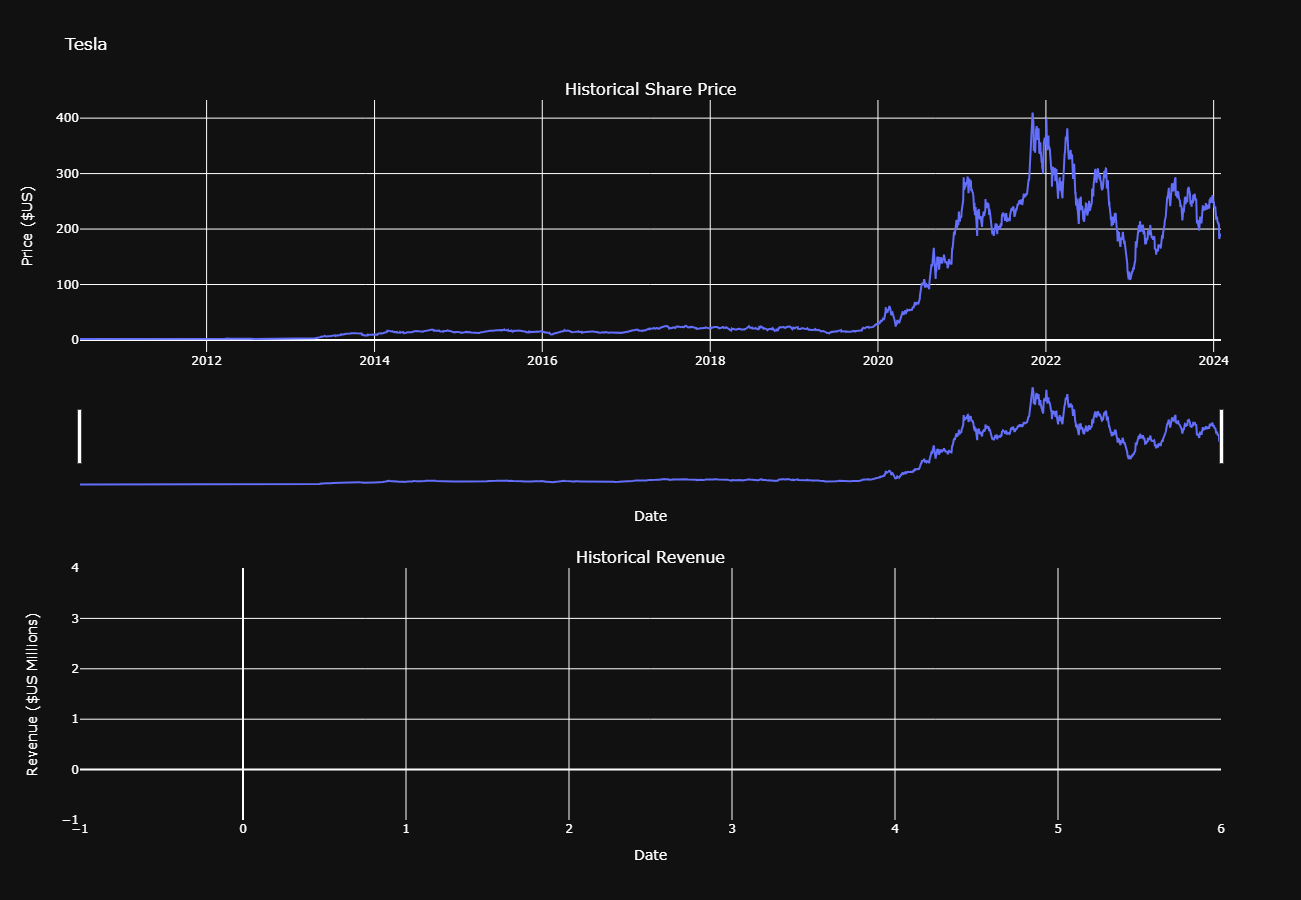

In [66]:
make_graph(tesla_data[['Date','Close']], tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph

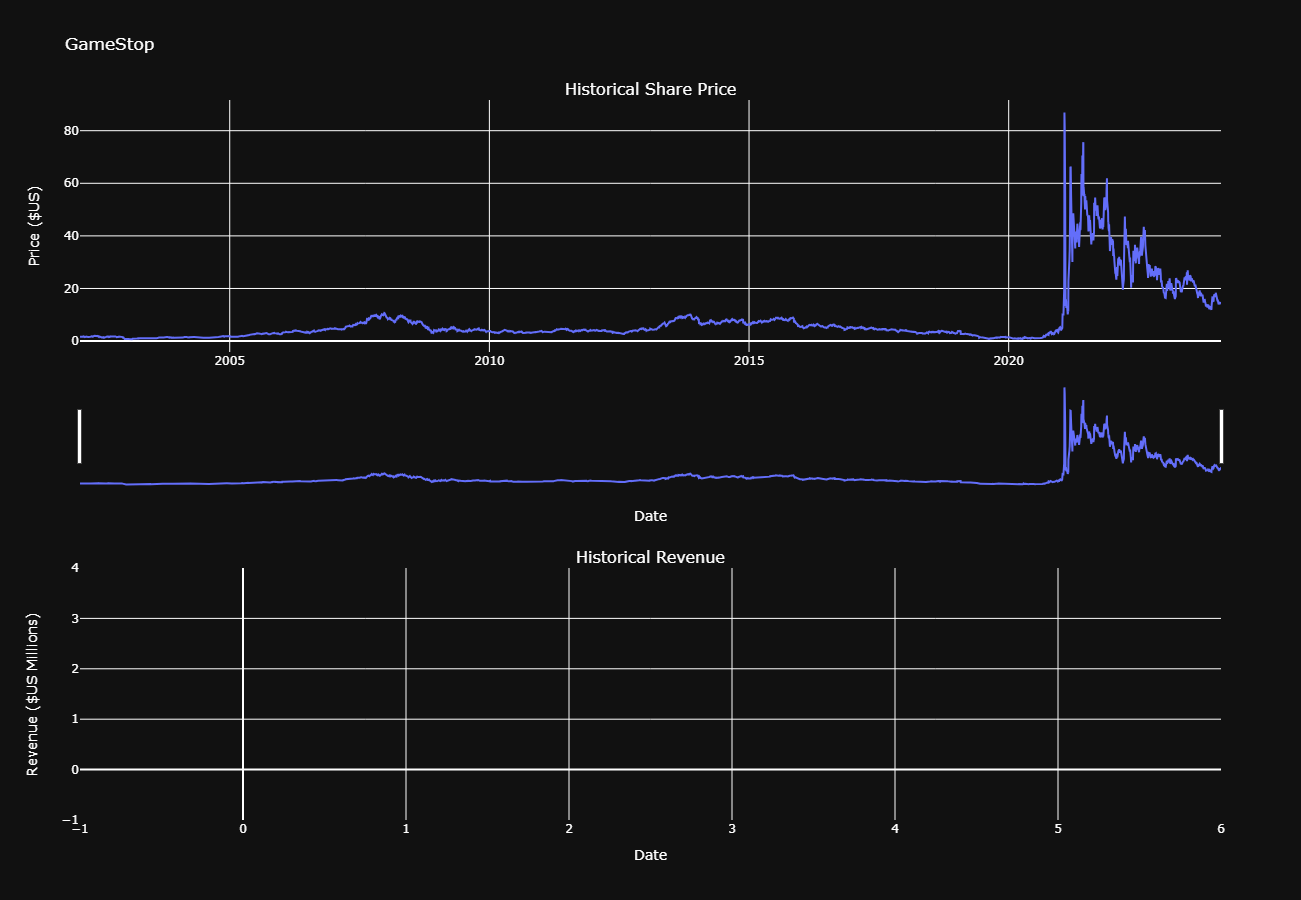

In [67]:
make_graph(gme_data[['Date','Close']], gme_revenue, 'GameStop')